## Read in data

In [1]:
import pandas as pd
data = pd.read_csv('data_pre_processed.csv', index_col = 0)
data.head(3)

,country,season,md,team,manager,formation,goals,gd,outcome,points,opp_team,opp_manager,opp_formation,opp_goals,opp_gd,opp_outcome,opp_points,avg_starter_age,total_starter_value
0,Germany,2004,1,1.FC Kaiserslautern,Kurt Jara,4-4-2 double 6,1.0,-2.0,loss,0.0,1.FC Nuremberg,Wolfgang Wolf,4-4-2 Diamond,3.0,2.0,win,3.0,27.818182,15.95
1,Germany,2004,2,1.FC Kaiserslautern,Kurt Jara,3-5-2,1.0,-1.0,loss,0.0,FC Schalke 04,Jupp Heynckes,3-5-2,2.0,1.0,win,3.0,28.000000,16.50
2,Germany,2004,3,1.FC Kaiserslautern,Kurt Jara,4-2-3-1,2.0,-1.0,loss,0.0,VfB Stuttgart,Matthias Sammer,4-4-2 Diamond,3.0,1.0,win,3.0,27.333333,14.20


Check for non-numeric data

In [2]:
data.dtypes

,0
country,object
season,int64
md,int64
team,object
manager,object
formation,object
goals,float64
gd,float64
outcome,object
points,float64


In [3]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

Encode non-numeric data that is easily encoded i.e. limited feature sub-space

In [4]:
data['country'] = lab.fit_transform(data['country'])
data['outcome'] = lab.fit_transform(data['outcome'])
data['opp_outcome'] = lab.fit_transform(data['opp_outcome'])
data['points'] = lab.fit_transform(data['points'])
data['opp_points'] = lab.fit_transform(data['opp_points'])
data.dtypes

,0
country,int64
season,int64
md,int64
team,object
manager,object
formation,object
goals,float64
gd,float64
outcome,int64
points,int64


#Marketing Techniques

In [5]:
data.describe()

,country,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_outcome,opp_points,avg_starter_age,total_starter_value
count,62889.000000,62889.000000,62889.000000,62889.000000,62889.000000,62889.000000,62889.000000,62889.000000,62889.000000,62889.000000,62889.000000,62889.000000,62889.000000
mean,2.004071,2013.179491,18.426005,1.342254,-0.000143,1.111514,0.999777,1.342397,0.000143,1.111737,1.000223,26.645236,110.280841
std,1.410098,5.195455,10.580209,1.227956,1.806049,0.785443,0.860869,1.228337,1.806049,0.785554,0.860869,1.579696,119.230868
min,0.000000,2004.000000,1.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,16.000000,0.000000
25%,1.000000,2009.000000,9.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,25.571429,36.200000
50%,2.000000,2013.000000,18.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,26.636364,65.500000
75%,3.000000,2018.000000,27.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,27.714286,135.800000
max,4.000000,2022.000000,38.000000,10.000000,9.000000,2.000000,2.000000,10.000000,9.000000,2.000000,2.000000,35.000000,1124.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62889 entries, 0 to 67836
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              62889 non-null  int64  
 1   season               62889 non-null  int64  
 2   md                   62889 non-null  int64  
 3   team                 62889 non-null  object 
 4   manager              62889 non-null  object 
 5   formation            62889 non-null  object 
 6   goals                62889 non-null  float64
 7   gd                   62889 non-null  float64
 8   outcome              62889 non-null  int64  
 9   points               62889 non-null  int64  
 10  opp_team             62889 non-null  object 
 11  opp_manager          62889 non-null  object 
 12  opp_formation        62889 non-null  object 
 13  opp_goals            62889 non-null  float64
 14  opp_gd               62889 non-null  float64
 15  opp_outcome          62889 non-null  int6

Find the number of managers per season to see if there are trends evident

In [7]:
# Group by date_served and count number of unique user_id's
managers_per_season = data.groupby(['season'])['manager'].nunique()
# Print head of daily_users
managers_per_season

,manager
season,
2004,140
2005,142
2006,128
2007,143
2008,139
2009,143
2010,140
2011,148
2012,138


The number of managers per season has remained relatively stavle over the 18 year timeframe.

The same is done for formations

In [8]:
# Group by date_served and count number of unique user_id's
formations_per_season = data.groupby(['season'])['formation'].nunique()

# Print head of daily_users
formations_per_season

,formation
season,
2004,25
2005,26
2006,24
2007,24
2008,24
2009,23
2010,23
2011,24
2012,23


Formations per season has remained consistent across the timeframe.

# APA Techniques

In [9]:
data.shape

(62889, 19)

In [10]:
data.columns

Index(['country', 'season', 'md', 'team', 'manager', 'formation', 'goals',
       'gd', 'outcome', 'points', 'opp_team', 'opp_manager', 'opp_formation',
       'opp_goals', 'opp_gd', 'opp_outcome', 'opp_points', 'avg_starter_age',
       'total_starter_value'],
      dtype='object')

In [11]:
model_features = data.columns.drop('total_starter_value')
model_target = 'total_starter_value'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['country', 'season', 'md', 'team', 'manager', 'formation', 'goals',
       'gd', 'outcome', 'points', 'opp_team', 'opp_manager', 'opp_formation',
       'opp_goals', 'opp_gd', 'opp_outcome', 'opp_points', 'avg_starter_age'],
      dtype='object')
Model target:  total_starter_value


In [12]:
#View numberical features(Some could just be classified as numeric)
import numpy as np
numerical_features_all = data[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = data[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)

Numerical columns: Index(['country', 'season', 'md', 'goals', 'gd', 'outcome', 'points',
       'opp_goals', 'opp_gd', 'opp_outcome', 'opp_points', 'avg_starter_age'],
      dtype='object')

Categorical columns: Index(['team', 'manager', 'formation', 'opp_team', 'opp_manager',
       'opp_formation'],
      dtype='object')


##Plots

In [13]:
data.head(3)

,country,season,md,team,manager,formation,goals,gd,outcome,points,opp_team,opp_manager,opp_formation,opp_goals,opp_gd,opp_outcome,opp_points,avg_starter_age,total_starter_value
0,2,2004,1,1.FC Kaiserslautern,Kurt Jara,4-4-2 double 6,1.0,-2.0,1,0,1.FC Nuremberg,Wolfgang Wolf,4-4-2 Diamond,3.0,2.0,2,2,27.818182,15.95
1,2,2004,2,1.FC Kaiserslautern,Kurt Jara,3-5-2,1.0,-1.0,1,0,FC Schalke 04,Jupp Heynckes,3-5-2,2.0,1.0,2,2,28.000000,16.50
2,2,2004,3,1.FC Kaiserslautern,Kurt Jara,4-2-3-1,2.0,-1.0,1,0,VfB Stuttgart,Matthias Sammer,4-4-2 Diamond,3.0,1.0,2,2,27.333333,14.20


Plot goals for home team per game

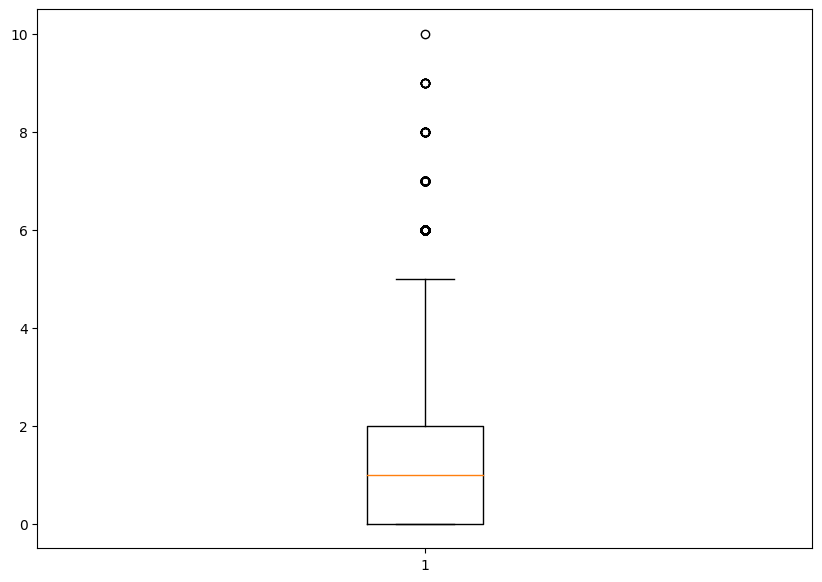

In [14]:
# Import libraries
import matplotlib.pyplot as plt

data_goals = data[['goals']]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data_goals)
# show plot
plt.show()

Can see the majority of values are between 0 and 2 averaging at ~ 1. There are outliers as high as 10.

The target variable, 'total starter value' is plotted.

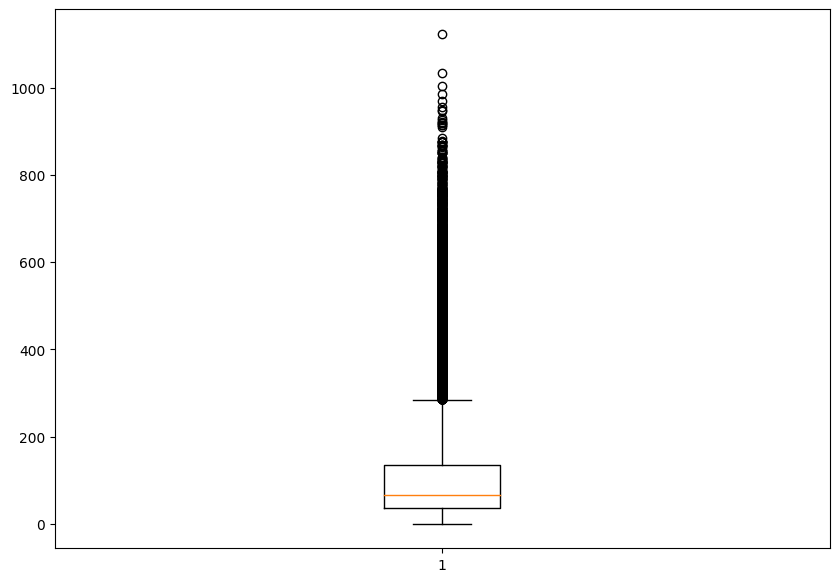

In [15]:
# Import libraries
import matplotlib.pyplot as plt
value = data[['total_starter_value']]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(value)
# show plot
plt.show()

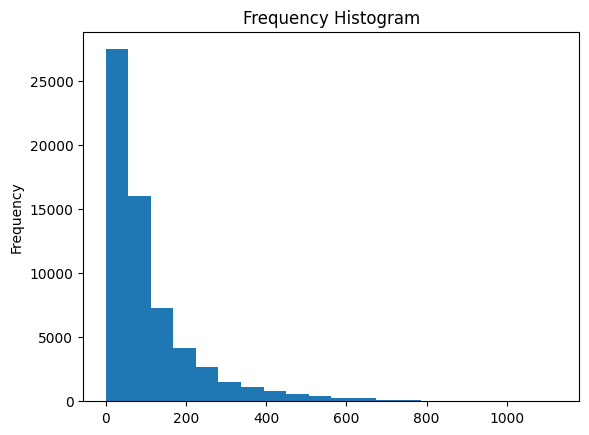

In [16]:
plt.hist(value, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

We can see there a number of very high outliers in this variable with the majority below 200 but some values reaching 1000.


The average starting age distribution is analysed.

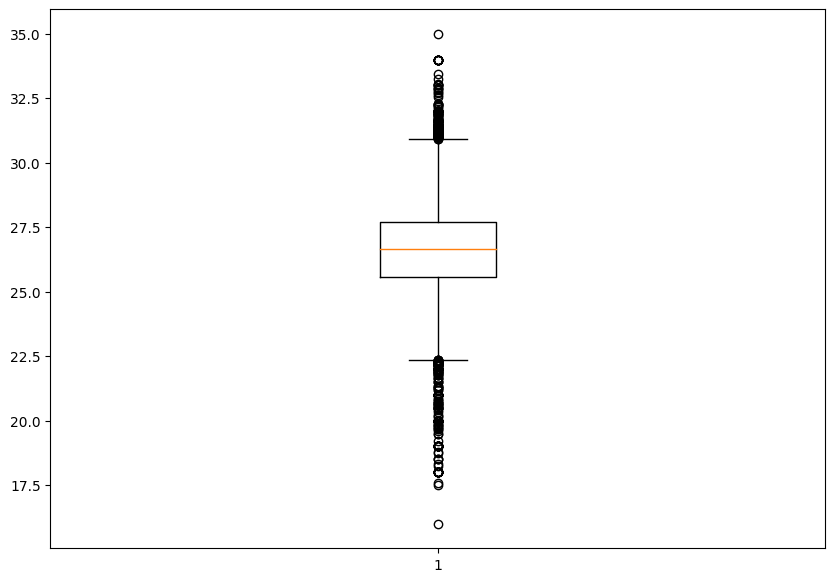

In [17]:
# Import libraries
import matplotlib.pyplot as plt

data_goals = data[['avg_starter_age']]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data_goals)
# show plot
plt.show()

The boxplot and histogram on this occassion show the data follows a much more normal distribution

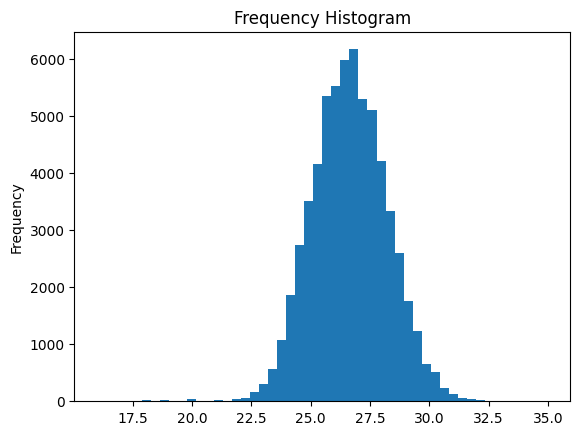

In [18]:
plt.hist(data_goals, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

The number of unique values for each feature are found.

In [19]:
#Number of unique values per feature
for c in categorical_features_all:
    print(data[c].value_counts())

team
Udinese Calcio            693
Inter Milan               692
ACF Fiorentina            691
AC Milan                  691
SS Lazio                  691
                         ... 
US Cremonese               21
AC Monza                   20
Nottingham Forest          17
Albacete Balompié          10
Gimnàstic de Tarragona      5
Name: count, Length: 202, dtype: int64
manager
Jürgen Klopp          604
Carlo Ancelotti       593
Claude Puel           571
José Mourinho         541
Unai Emery            533
                     ... 
Martín Monteagudo       1
Alberto Gallego         1
Juan Carlos Oliva       1
Albert Stuivenberg      1
Frank Barlow            1
Name: count, Length: 828, dtype: int64
formation
4-2-3-1                  15627
4-4-2 double 6            9741
4-3-3 Attacking           8913
4-4-2                     3309
3-5-2 flat                3144
4-3-1-2                   2989
4-1-4-1                   2851
4-5-1                     2595
4-4-2 Diamond             2304
3-4-

A bar plot for each categorical feature is created


formation


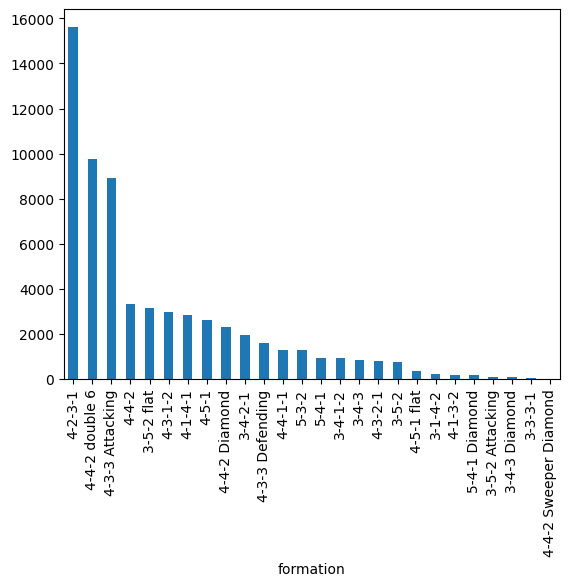

opp_formation


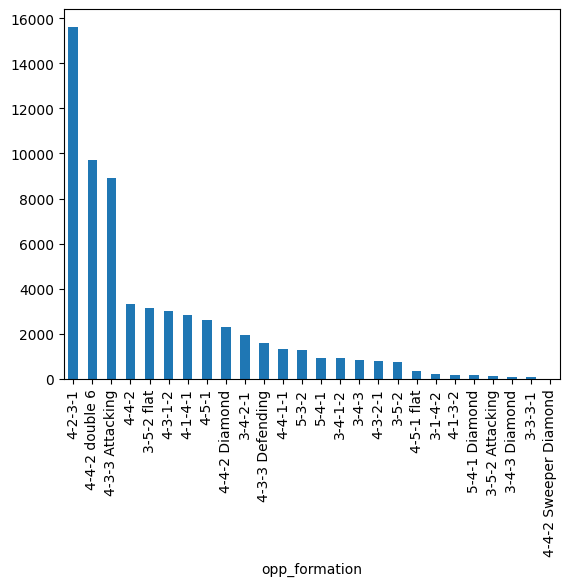

In [20]:
#Lets see variables with few unique values
import matplotlib.pyplot as plt
%matplotlib inline

for c in categorical_features_all:
    if len(data[c].value_counts()) < 50:
        print(c)
        data[c].value_counts().plot.bar()
        plt.show()

Same is done for numeric features

country


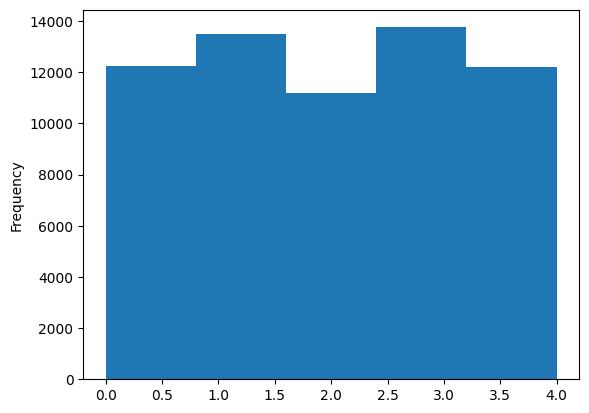

season


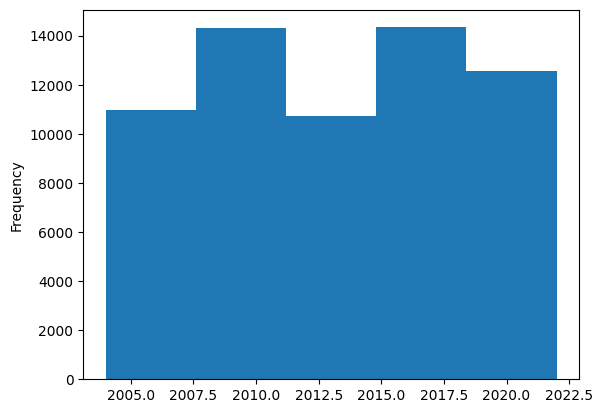

md


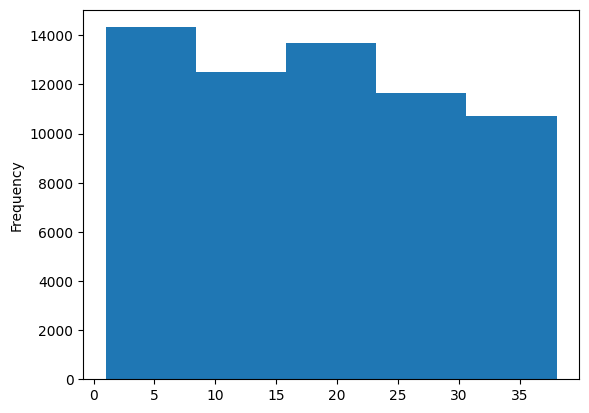

goals


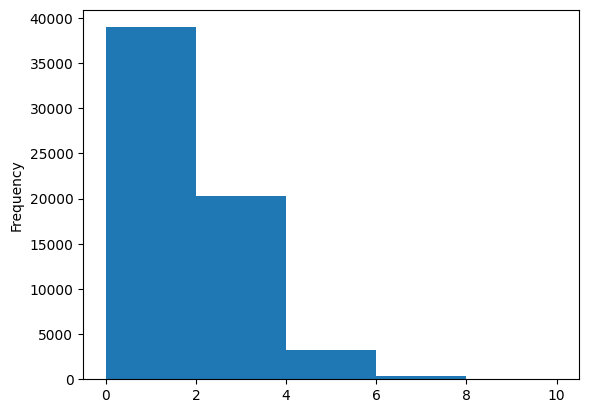

gd


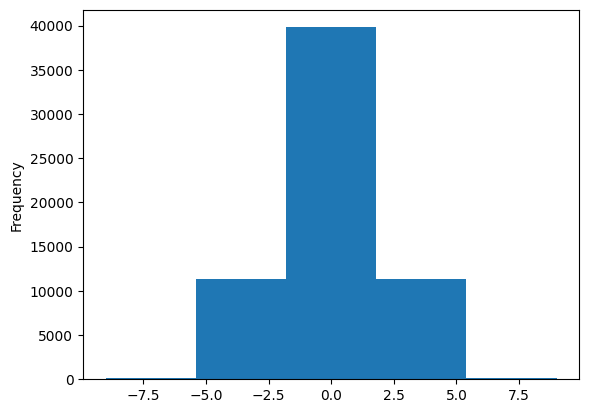

outcome


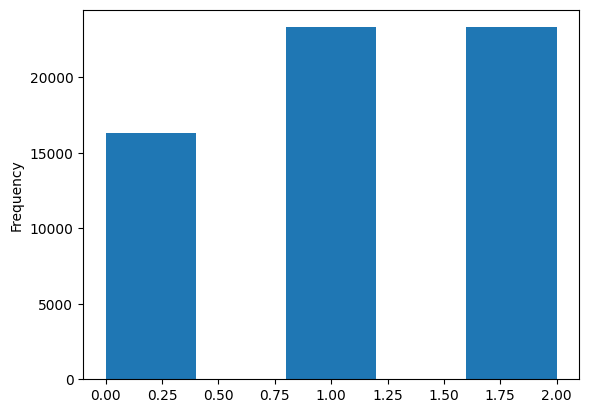

points


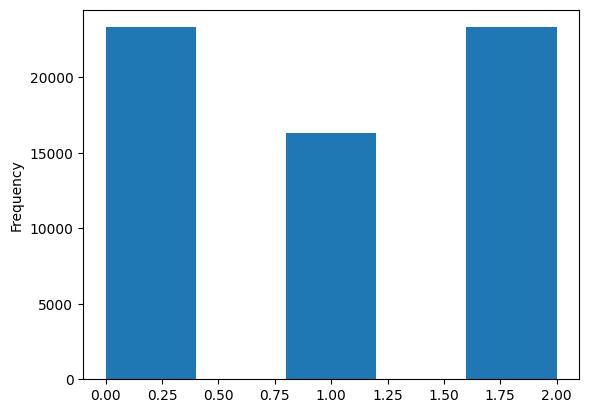

opp_goals


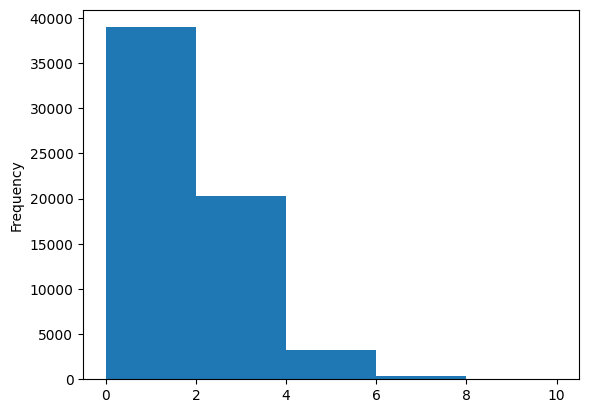

opp_gd


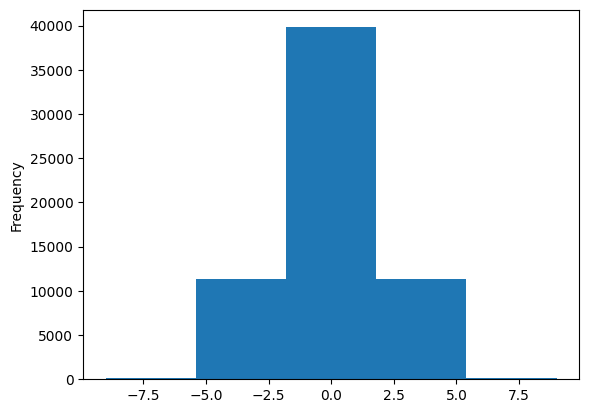

opp_outcome


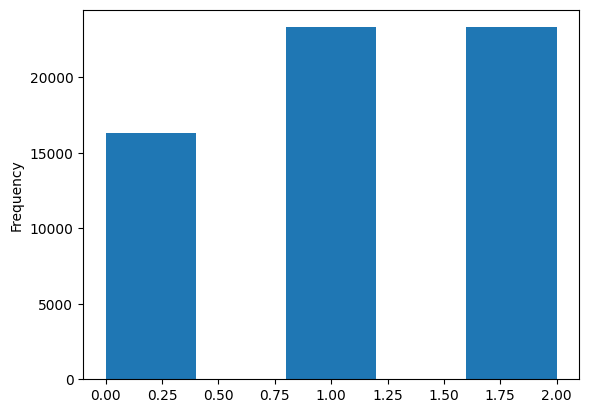

opp_points


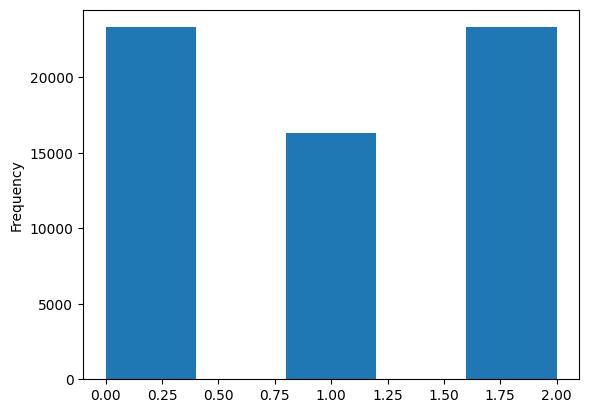

avg_starter_age


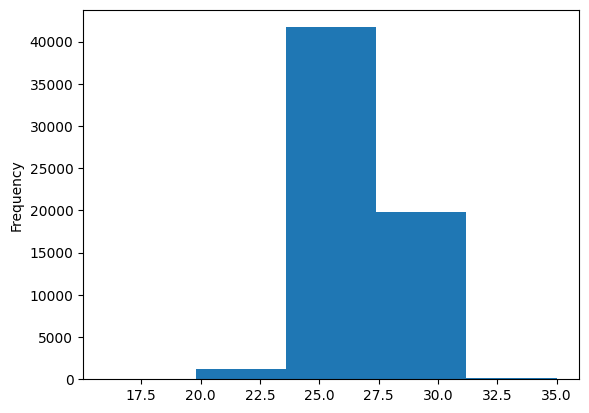

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    data[c].plot.hist(bins=5)
    plt.show()

The minimum and maximum values for each numeric feature is found

In [22]:
for c in numerical_features_all:
    print(c)
    print('min:', data[c].min(), 'max:', data[c].max())

country
min: 0 max: 4
season
min: 2004 max: 2022
md
min: 1 max: 38
goals
min: 0.0 max: 10.0
gd
min: -9.0 max: 9.0
outcome
min: 0 max: 2
points
min: 0 max: 2
opp_goals
min: 0.0 max: 10.0
opp_gd
min: -9.0 max: 9.0
opp_outcome
min: 0 max: 2
opp_points
min: 0 max: 2
avg_starter_age
min: 16.0 max: 35.0


In [24]:
#Can increase bins to get more refined view of numerical features
for c in numerical_features_all:
    print(c)
    print(data[c].value_counts(bins=10, sort=False))

country
(-0.005, 0.4]    12233
(0.4, 0.8]           0
(0.8, 1.2]       13476
(1.2, 1.6]           0
(1.6, 2.0]       11202
(2.0, 2.4]           0
(2.4, 2.8]           0
(2.8, 3.2]       13758
(3.2, 3.6]           0
(3.6, 4.0]       12220
Name: count, dtype: int64
season
(2003.981, 2005.8]    5063
(2005.8, 2007.6]      5904
(2007.6, 2009.4]      7138
(2009.4, 2011.2]      7160
(2011.2, 2013.0]      7153
(2013.0, 2014.8]      3573
(2014.8, 2016.6]      7167
(2016.6, 2018.4]      7172
(2018.4, 2020.2]      6933
(2020.2, 2022.0]      5626
Name: count, dtype: int64
md
(0.962, 4.7]    7188
(4.7, 8.4]      7141
(8.4, 12.1]     7186
(12.1, 15.8]    5311
(15.8, 19.5]    6964
(19.5, 23.2]    6745
(23.2, 26.9]    5012
(26.9, 30.6]    6626
(30.6, 34.3]    6394
(34.3, 38.0]    4322
Name: count, dtype: int64
goals
(-0.011, 1.0]    38971
(1.0, 2.0]       13881
(2.0, 3.0]        6432
(3.0, 4.0]        2471
(4.0, 5.0]         793
(5.0, 6.0]         252
(6.0, 7.0]          61
(7.0, 8.0]          19
(8.0

Each numeric feature's histogram is plotted

country


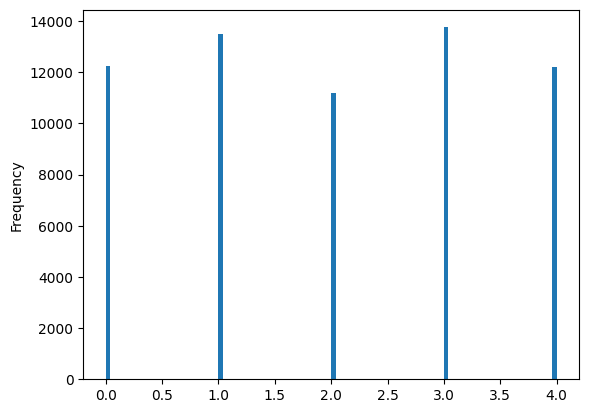

season


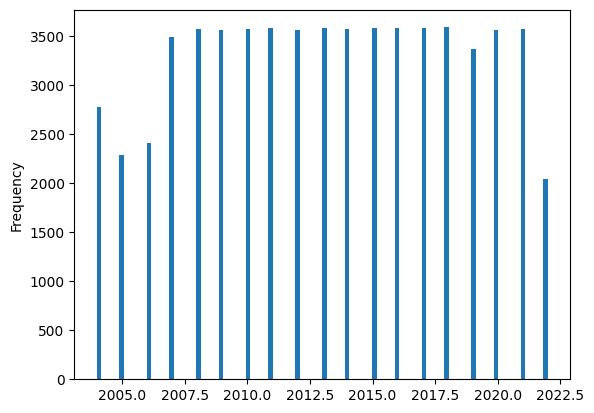

md


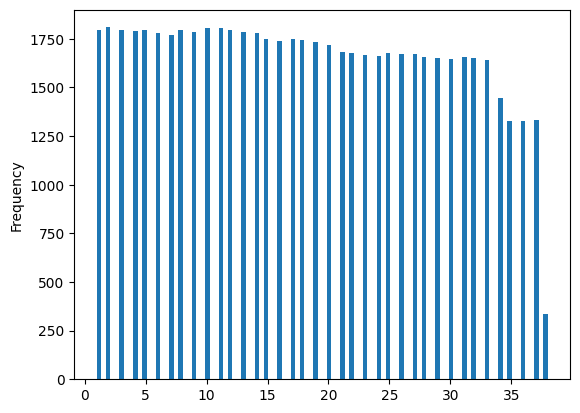

goals


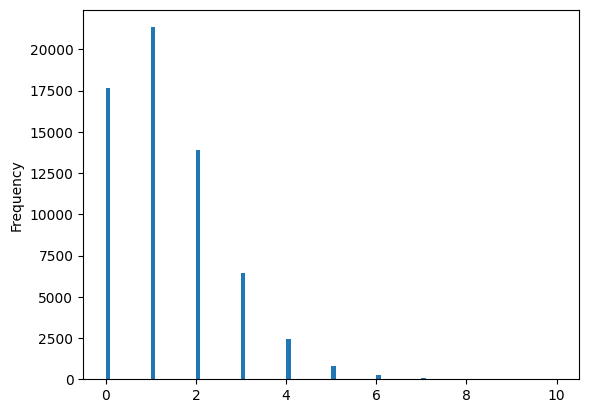

gd


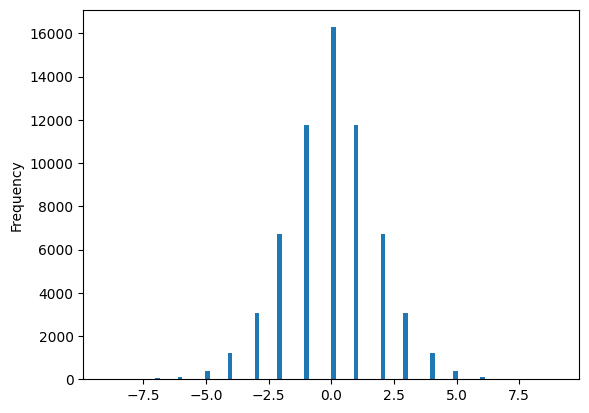

outcome


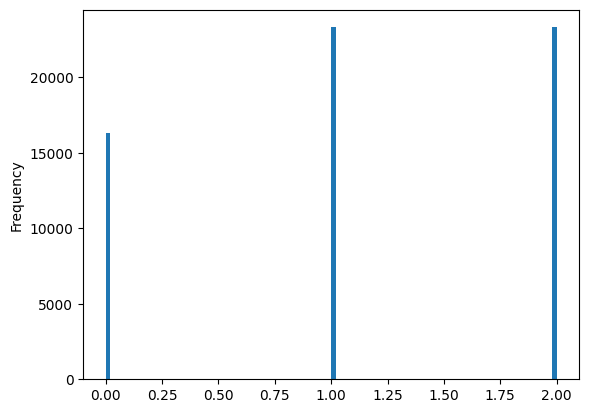

points


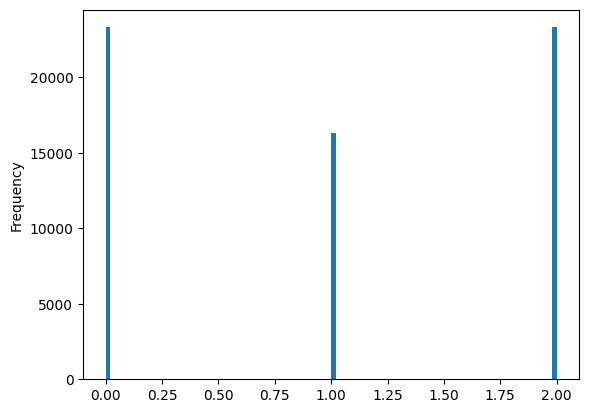

opp_goals


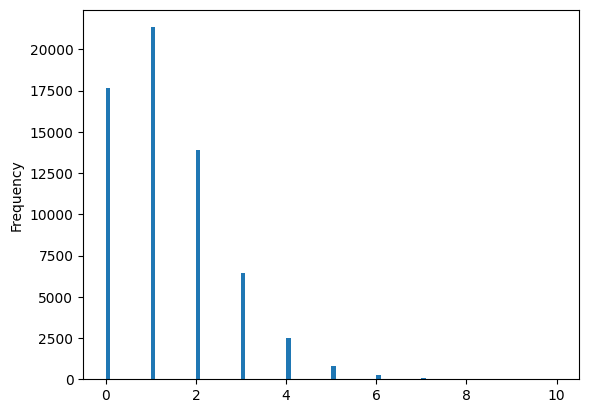

opp_gd


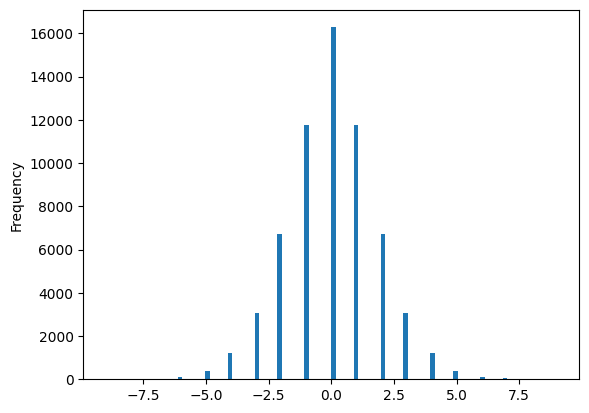

opp_outcome


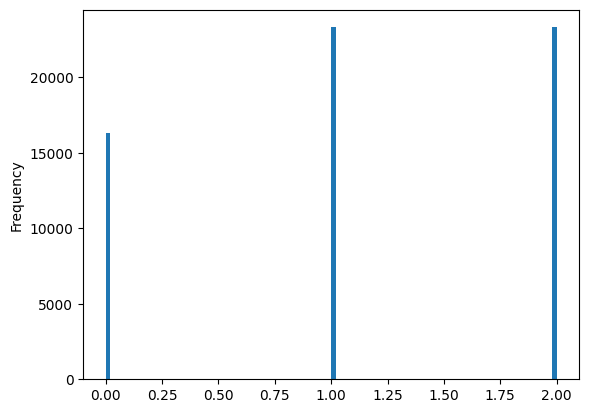

opp_points


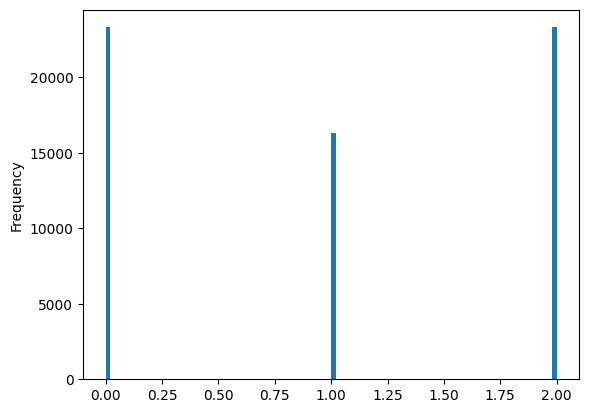

avg_starter_age


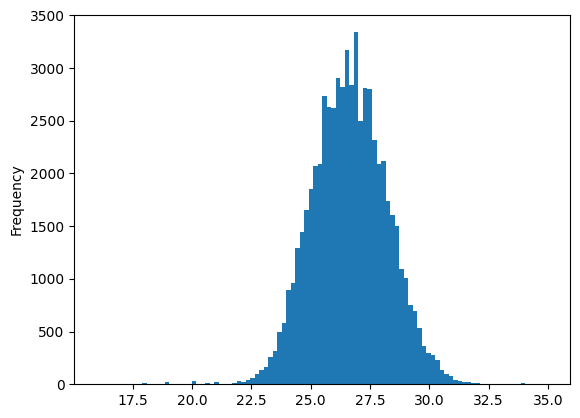

In [25]:
for c in numerical_features_all:
    print(c)
    data[c].plot.hist(bins=100)
    plt.show()

A matrix of scatter plots is created showing each features interaction with all other features.

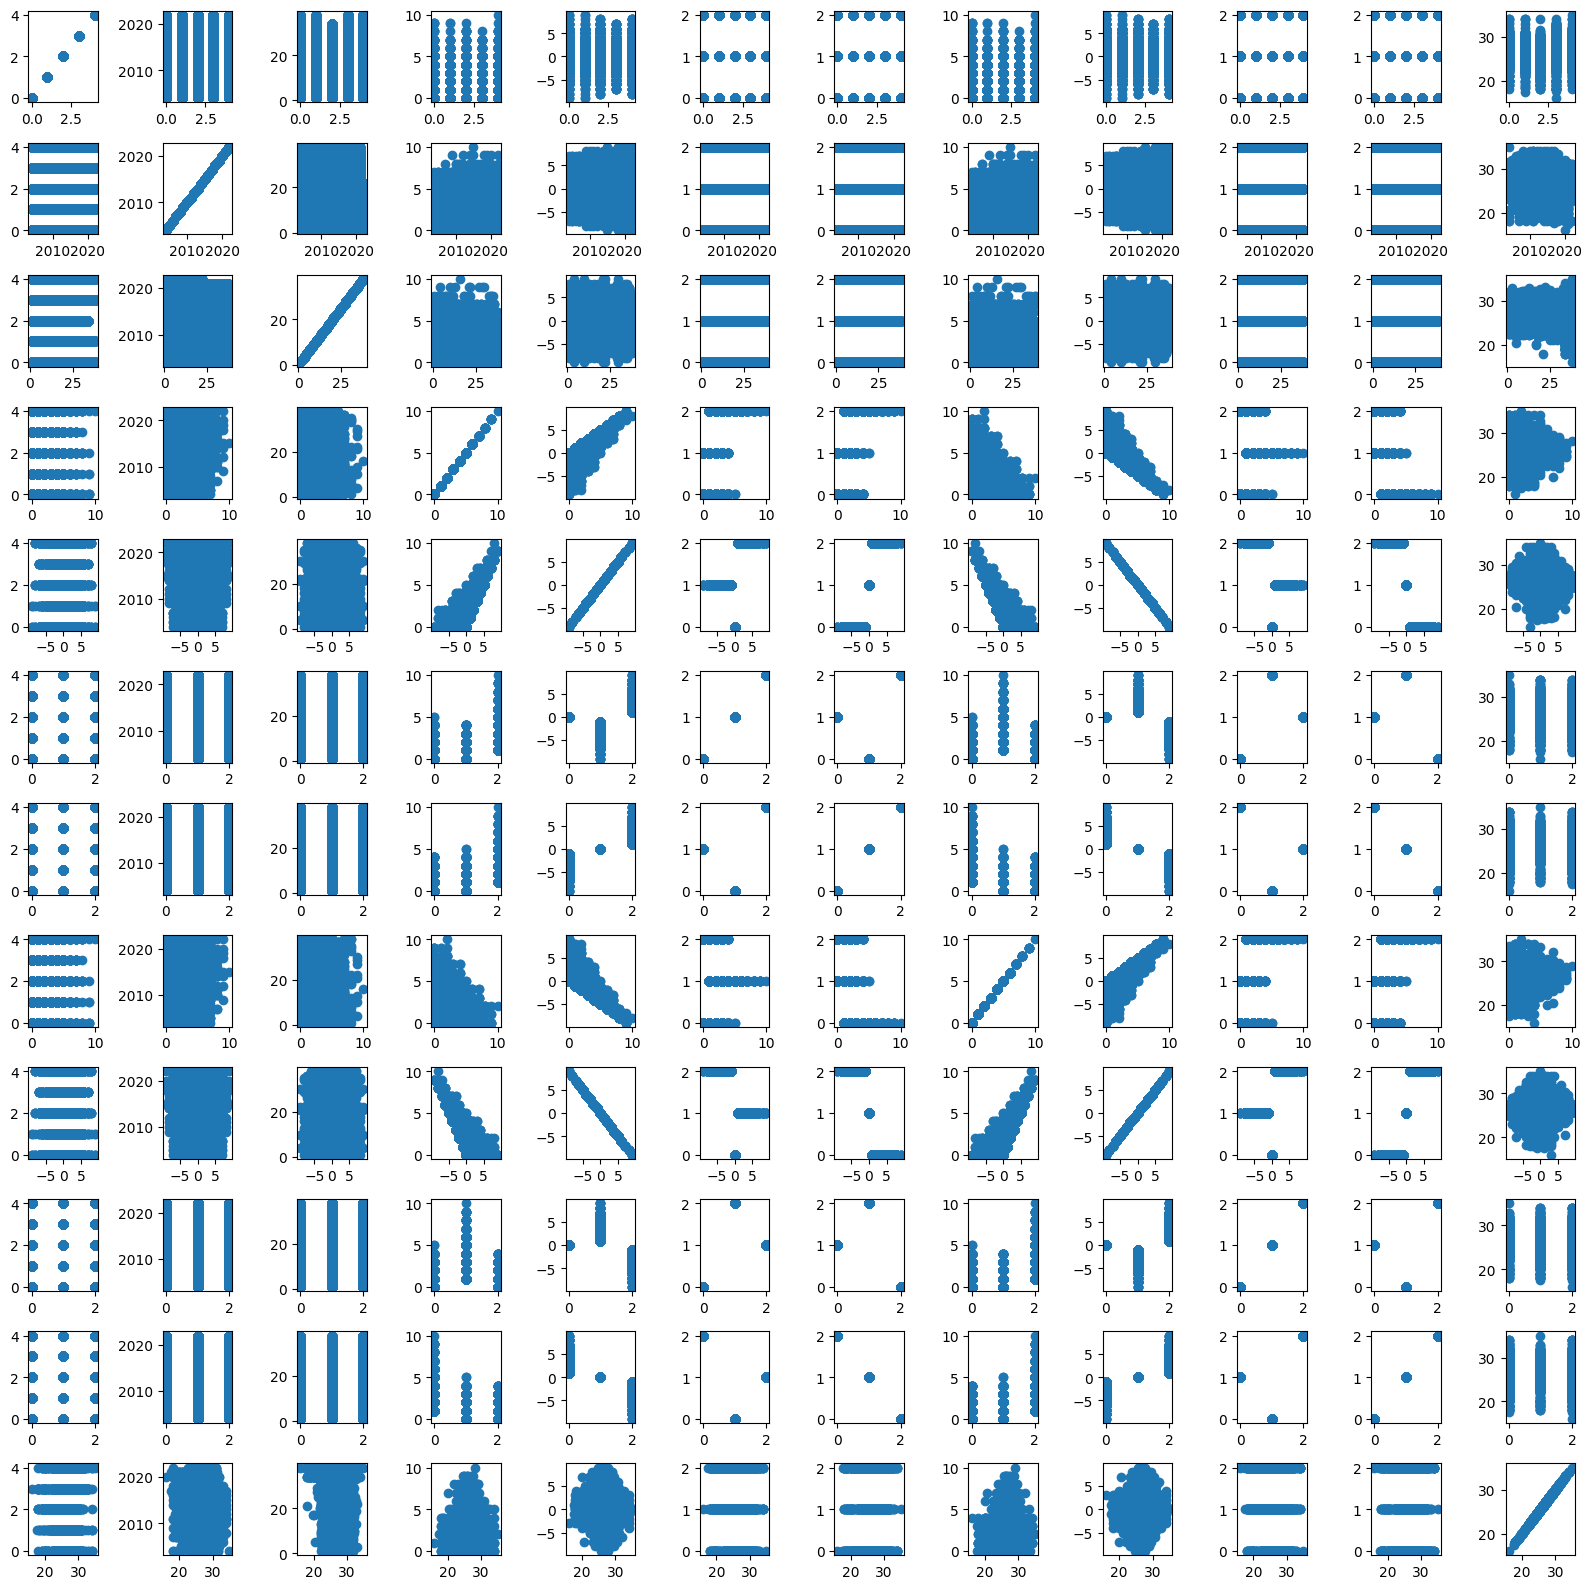

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(numerical_features_all), len(numerical_features_all), figsize=(16, 16), sharex=False, sharey=False)
for i in range(0,len(numerical_features_all)):
    for j in range(0,len(numerical_features_all)):
        axes[i,j].scatter(x = data[numerical_features_all[i]], y = data[numerical_features_all[j]])
fig.tight_layout()

A correlation matrix is created to further highlight feature interactions

In [27]:
cols=[numerical_features_all[0], numerical_features_all[1], numerical_features_all[2], numerical_features_all[3], numerical_features_all[4], numerical_features_all[5], numerical_features_all[6], numerical_features_all[7], numerical_features_all[8]]
#print(df[cols].corr())
data[cols].corr().style.background_gradient(cmap='tab20c')

,country,season,md,goals,gd,outcome,points,opp_goals,opp_gd
country,1.000000,0.010217,-0.000745,0.011161,0.000225,0.006022,0.000132,0.010827,-0.000225
season,0.010217,1.000000,-0.043037,0.032852,-0.000219,0.018413,-0.000091,0.033164,0.000219
md,-0.000745,-0.043037,1.000000,0.005919,-0.000030,0.008543,-0.000379,0.005961,0.000030
goals,0.011161,0.032852,0.005919,1.000000,0.735177,0.493246,0.635531,-0.081257,-0.735177
gd,0.000225,-0.000219,-0.000030,0.735177,1.000000,0.473693,0.864451,-0.735371,-1.000000
outcome,0.006022,0.018413,0.008543,0.493246,0.473693,1.000000,0.547887,-0.203387,-0.473693
points,0.000132,-0.000091,-0.000379,0.635531,0.864451,0.547887,1.000000,-0.635686,-0.864451
opp_goals,0.010827,0.033164,0.005961,-0.081257,-0.735371,-0.203387,-0.635686,1.000000,0.735371
opp_gd,-0.000225,0.000219,0.000030,-0.735177,-1.000000,-0.473693,-0.864451,0.735371,1.000000


#Data Viz

In [29]:
data2 = data['total_starter_value'].groupby(data['season']).mean()
data2

,total_starter_value
season,
2004,53.504798
2005,56.492491
2006,60.550214
2007,68.522961
2008,75.131162
2009,77.728630
2010,85.367026
2011,79.236085
2012,81.843170


In [30]:
data3 = data['avg_starter_age'].groupby(data['season']).mean()
data3

,avg_starter_age
season,
2004,26.862527
2005,26.890500
2006,26.971690
2007,26.752353
2008,26.799617
2009,26.719996
2010,26.670552
2011,26.635555
2012,26.674234


Plot average starting age vs team value over the time period

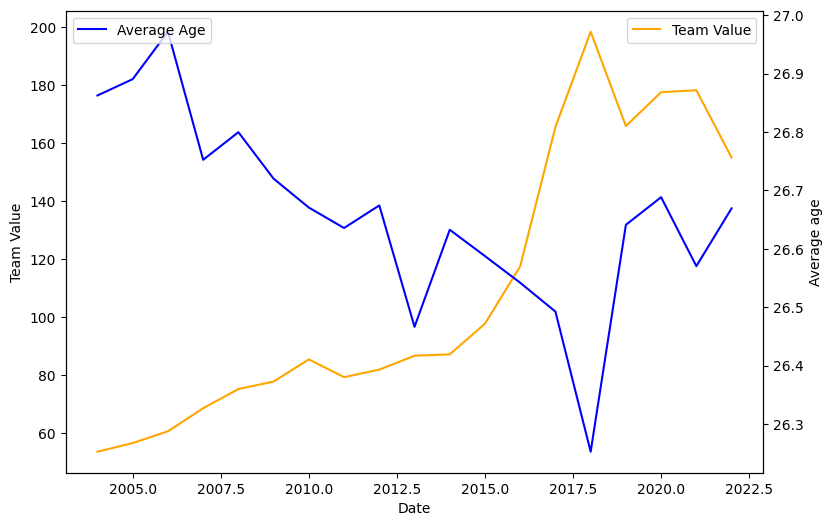

In [31]:
fig, ax1 = plt.subplots(figsize=(9, 6))

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
ax1.set_xlabel("Date")
ax1.set_ylabel("Team Value")
ax2.set_ylabel('Average age')
ax1.plot(data2, color='orange', label='Team Value')
ax2.plot(data3, color='blue', label='Average Age')
ax1.legend()
ax2.legend(loc='upper left')

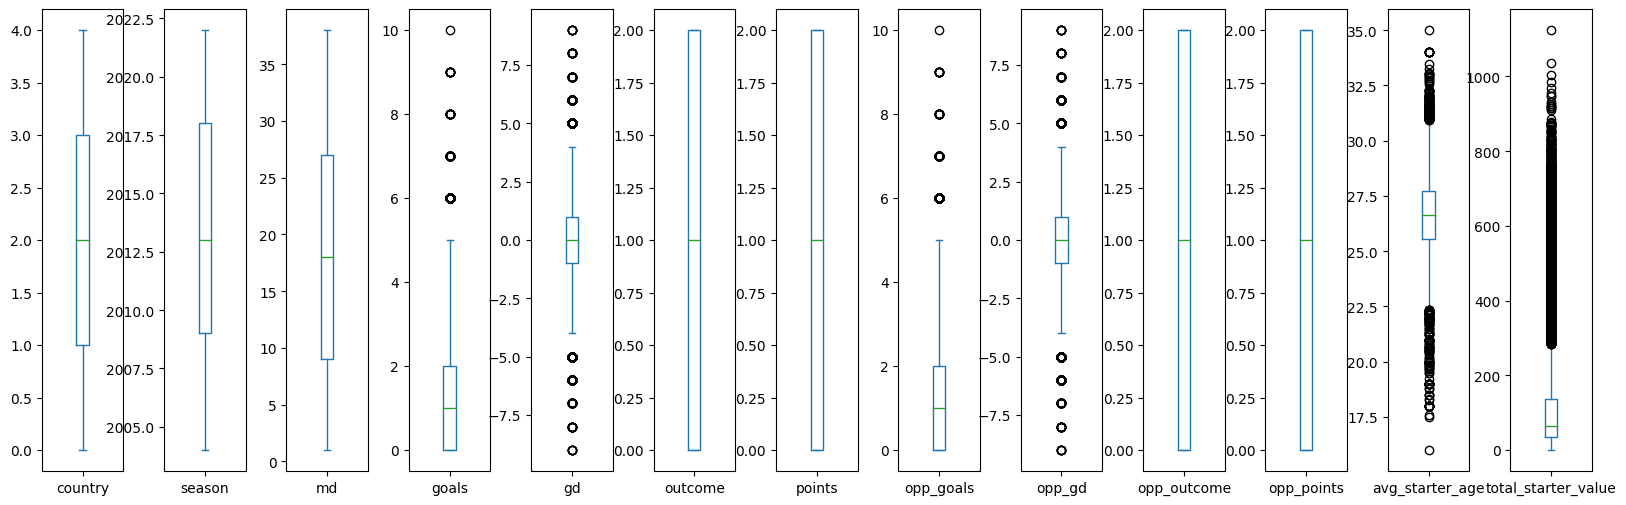

In [32]:
data.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(20, 6)
)
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

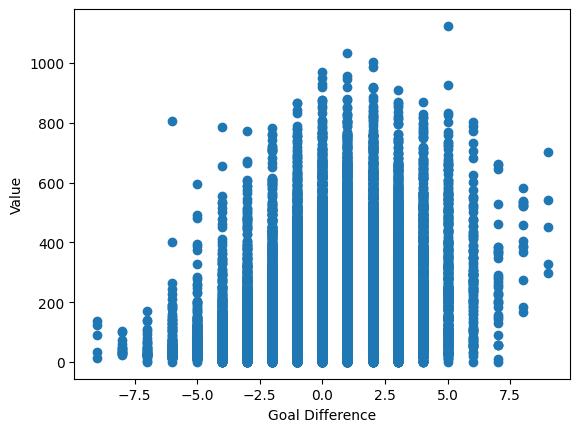

In [33]:
import matplotlib.pyplot as plt
plt.scatter(data['gd'], data['total_starter_value'])
plt.xlabel('Goal Difference')
plt.ylabel('Value')
plt.show()

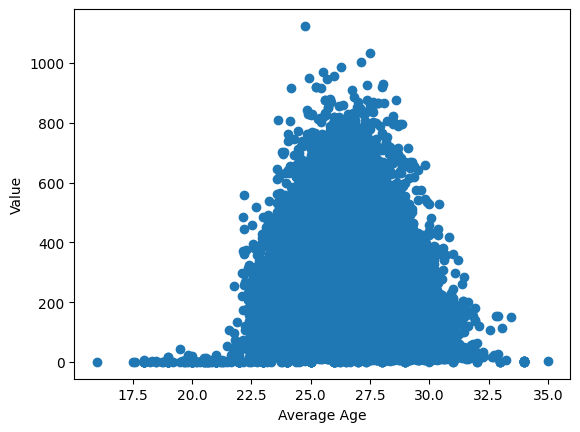

In [34]:
import matplotlib.pyplot as plt
plt.scatter(data['avg_starter_age'], data['total_starter_value'])
plt.xlabel('Average Age')
plt.ylabel('Value')
plt.show()

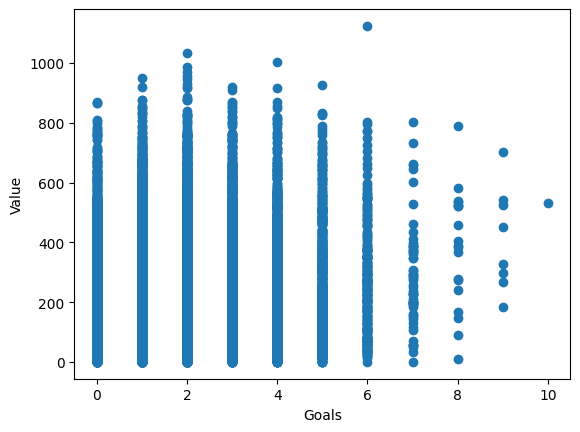

In [35]:
import matplotlib.pyplot as plt
plt.scatter(data['goals'], data['total_starter_value'])
plt.xlabel('Goals')
plt.ylabel('Value')
plt.show()

In [37]:
numeric_data = data[numerical_features_all]
numeric_data.head(3)

,country,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_outcome,opp_points,avg_starter_age
0,2,2004,1,1.0,-2.0,1,0,3.0,2.0,2,2,27.818182
1,2,2004,2,1.0,-1.0,1,0,2.0,1.0,2,2,28.000000
2,2,2004,3,2.0,-1.0,1,0,3.0,1.0,2,2,27.333333


#Cluster

In [38]:
numerical_features_all = ['country', 'season', 'md', 'goals', 'gd', 'outcome', 'points', 'opp_goals', 'opp_gd',
       'opp_points', 'avg_starter_age', 'total_starter_value']

In [39]:
X = data[numerical_features_all]

In [40]:
#Initialize our scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [42]:
X_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.002887,-1.766845,-1.647051,-0.278720,-1.107319,-0.141977,-1.161368,1.349480,1.107319,1.161368,0.742520,-0.791168
1,-0.002887,-1.766845,-1.552534,-0.278720,-0.553620,-0.141977,-1.161368,0.535365,0.553620,1.161368,0.857617,-0.786555
2,-0.002887,-1.766845,-1.458017,0.535647,-0.553620,-0.141977,-1.161368,1.349480,0.553620,1.161368,0.435592,-0.805845


In [43]:
#Initialize our model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [44]:
#Fit our model
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [45]:
#Find which cluster each data-point belongs to
clusters = kmeans.predict(X_scaled)

In [46]:
#Add the cluster vector to our DataFrame, X
data["Cluster"] = clusters
data.head(3)

,country,season,md,team,manager,formation,goals,gd,outcome,points,opp_team,opp_manager,opp_formation,opp_goals,opp_gd,opp_outcome,opp_points,avg_starter_age,total_starter_value,Cluster
0,2,2004,1,1.FC Kaiserslautern,Kurt Jara,4-4-2 double 6,1.0,-2.0,1,0,1.FC Nuremberg,Wolfgang Wolf,4-4-2 Diamond,3.0,2.0,2,2,27.818182,15.95,1
1,2,2004,2,1.FC Kaiserslautern,Kurt Jara,3-5-2,1.0,-1.0,1,0,FC Schalke 04,Jupp Heynckes,3-5-2,2.0,1.0,2,2,28.000000,16.50,1
2,2,2004,3,1.FC Kaiserslautern,Kurt Jara,4-2-3-1,2.0,-1.0,1,0,VfB Stuttgart,Matthias Sammer,4-4-2 Diamond,3.0,1.0,2,2,27.333333,14.20,1


In [47]:
numeric_data["Cluster"] = clusters
numeric_data.head(3)

<ipython-input-47-c3bd5fd67a06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data["Cluster"] = clusters


,country,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_outcome,opp_points,avg_starter_age,Cluster
0,2,2004,1,1.0,-2.0,1,0,3.0,2.0,2,2,27.818182,1
1,2,2004,2,1.0,-1.0,1,0,2.0,1.0,2,2,28.000000,1
2,2,2004,3,2.0,-1.0,1,0,3.0,1.0,2,2,27.333333,1


In [48]:
numeric_data.groupby('Cluster').mean()

,country,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_outcome,opp_points,avg_starter_age
Cluster,,,,,,,,,,,,
0,1.987103,2012.985506,18.238777,0.982251,0.000000,0.0,1.0,0.982251,0.000000,0.0,1.0,26.679877
1,2.009781,2013.247791,18.496053,0.561733,-1.813213,1.0,0.0,2.374946,1.813213,2.0,2.0,26.661565
2,2.010216,2013.246738,18.486779,2.374871,1.813917,2.0,2.0,0.560955,-1.813917,1.0,0.0,26.604684


####Find optimum clusters

In [49]:
X = data[numerical_features_all]
X.head(3)

,country,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value
0,2,2004,1,1.0,-2.0,1,0,3.0,2.0,2,27.818182,15.95
1,2,2004,2,1.0,-1.0,1,0,2.0,1.0,2,28.000000,16.50
2,2,2004,3,2.0,-1.0,1,0,3.0,1.0,2,27.333333,14.20


In [50]:
X = X.astype(int)

In [51]:
X.dtypes

,0
country,int64
season,int64
md,int64
goals,int64
gd,int64
outcome,int64
points,int64
opp_goals,int64
opp_gd,int64
opp_points,int64


In [52]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [53]:
labels = model.predict(X)

In [55]:
X['Cluster'] = labels
X.head(3)

,country,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value,Cluster
0,2,2004,1,1,-2,1,0,3,2,2,27,15,2
1,2,2004,2,1,-1,1,0,2,1,2,28,16,2
2,2,2004,3,2,-1,1,0,3,1,2,27,14,2


In [56]:
X.Cluster.unique()

array([2, 0, 1], dtype=int32)

In [57]:
X.groupby(by=["Cluster"]).mean()

,country,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value
Cluster,,,,,,,,,,,,
0,1.815739,2015.216030,18.247952,1.680012,0.534716,1.253617,1.231340,1.145296,-0.534716,0.768660,25.941514,202.993723
1,1.894302,2017.961189,17.955133,2.169832,1.236994,1.464079,1.486375,0.932838,-1.236994,0.513625,26.035508,482.140930
2,2.065962,2012.227502,18.513389,1.181651,-0.248696,1.043600,0.896023,1.430347,0.248696,1.103977,26.265646,54.284091


In [58]:
import plotly.express as px

Plot key metrics that determine cluster assignations

In [59]:
fig = px.scatter_3d(X, x='points', y='avg_starter_age', z='total_starter_value', color='Cluster')
fig.show()

In [60]:
fig = px.scatter_3d(X, x='season', y='avg_starter_age', z='total_starter_value', color='Cluster')
fig.show()

In [ ]:
#3 key variables are goals, outcome, avg_starter_age

In [61]:
numeric_data = data[numerical_features_all]
numeric_data

,country,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value
0,2,2004,1,1.0,-2.0,1,0,3.0,2.0,2,27.818182,15.95
1,2,2004,2,1.0,-1.0,1,0,2.0,1.0,2,28.000000,16.50
2,2,2004,3,2.0,-1.0,1,0,3.0,1.0,2,27.333333,14.20
3,2,2004,4,3.0,1.0,2,2,2.0,-1.0,0,26.928571,17.95
4,2,2004,5,2.0,1.0,2,2,1.0,-1.0,0,26.428571,17.65
...,...,...,...,...,...,...,...,...,...,...,...,...
67832,2,2022,15,2.0,1.0,2,2,1.0,-1.0,0,25.333333,314.20
67833,2,2022,16,1.0,0.0,0,1,1.0,0.0,1,26.272727,276.00
67834,2,2022,17,6.0,5.0,2,2,1.0,-5.0,0,26.090909,279.00
67835,2,2022,18,2.0,1.0,2,2,1.0,-1.0,0,25.454545,290.00


In [62]:
numeric_data['Cluster'] = labels
numeric_data.head(3)

<ipython-input-62-1a7e9ddd6eac>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value,Cluster
0,2,2004,1,1.0,-2.0,1,0,3.0,2.0,2,27.818182,15.95,2
1,2,2004,2,1.0,-1.0,1,0,2.0,1.0,2,28.000000,16.50,2
2,2,2004,3,2.0,-1.0,1,0,3.0,1.0,2,27.333333,14.20,2


In [63]:
numeric_data.to_csv('data_numeric.csv')